In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_parquet('lba.parquet')

### CLEANING
For the moment I keep only the data in the ReferenceAtlas sample. Indistinguishable lipids are not considered

In [4]:
# use 'sample' = reference atlas for now
data = data[data['Sample'] == 'ReferenceAtlas']

# Discard indistinguishable lipids 
lipid_names = ['HexCer 42:2;O2', 'HexCer 42:1;O2', 'HexCer 40:1;O2', 'PC 38:6', 'PA 34:1', 'SM 36:1;O2', 'HexCer 40:2;O2', 'PG 40:6', 'PC 40:6', 'HexCer 36:1:O2', 'PE 40:6', 'PG 36:0', 'HexCer 41:1;O2', 'PE 42:9', 'PE 38:6', 'PC 40:7', 'PC 34:1 PC 36:4 PE 37:1 PE 39:4', 'LPE 22:6', 'PA 36:1', 'PE 40:7', 'PG 37:4', 'Cer 42:2;O2', 'Cer 40:2;O2', 'LPE 22:4', 'PA 40:6', 'PC 34:2', 'PC 40:1', 'PS 36:1', 'PC 35:1 PC O-38:7 PE 38:1 PE O-41:7', 'SM 42:1;O2', 'PI 36:4', 'SM 38:1;O2', 'PC 42:1', 'SM 34:1;O2', 'PE 40:4', 'PA 38:3', 'PG 36:2', 'PC 30:0', 'TG 67:2', 'TG 72:9', 'LPA 18:1', 'LPC O-16:2', 'LPC 16:0', 'LPC O-16:0', 'LPC O-18:2', 'LPE 18:1', 'LPS 16:0', 'LPE 18:0', 'LPC O-18:0', 'LPE 20:0', 'LPC 18:1', 'LPG 20:1', 'LPC 18:0', 'LPE 22:1', 'LPC 20:4', 'LPC 20:1', 'Cer 36:1;O2', 'LPC 22:6', 'Cer 40:1;O2', 'Cer 41:2;O2', 'Cer 40:0;O2', 'DG 35:0', 'Cer 42:1;O2', 'PA 32:1', 'PA 32:0', 'SM 31:1;O2', 'PE O-34:2', 'PC 31:0 PE 34:0', 'PA 36:1 PA 38:4', 'PE 32:2', 'HexCer 36:2;O2', 'PC 32:1', 'PC 32:0', 'PA 36:4', 'PA 36:2', 'PC 31:0 PE 34:0 PE 36:3', 'PA 38:5', 'PG 32:0', 'PE 36:1', 'PC O-34:1', 'PE 36:0', 'HexCer 36:1;O2', 'PS 32:1', 'HexCer 38:2;O2', 'SM 35:1;O2', 'PC 31:1 PE 34:1', 'PE O-36:0 PE O-38:3', 'PC O-32:0', 'PE O-38:2', 'PC 34:1', 'PE O-36:5', 'PC 34:0', 'PA 38:4', 'PE O-36:3', 'SM 36:2;O2', 'PE O-36:2', 'PE O-36:1', 'PC 35:1 PE 38:1', 'PA 40:4', 'PE O-38:7', 'PG 34:1', 'PG 35:0', 'PE O-38:6', 'PG 34:0', 'PC 37:5 PE 38:2 PE 40:5', 'HexCer 38:1;O2 PG 36:1', 'PC 35:0', 'PE 38:7', 'PS 34:1', 'PS 36:4', 'PC 37:1 PE 40:1', 'PS 36:3', 'PG 37:5', 'PE 38:4', 'PG 37:2', 'PC O-36:1', 'PG 37:1', 'SM 42:2;O2', 'PE O-40:7', 'PG 36:1', 'PS 38:1', 'PG 38:5', 'PC 39:6 PE 40:3 PE 42:6', 'PG 38:4', 'PG 39:0', 'SM 41:2;O2', 'PC 36:3', 'PG 38:3', 'PC 36:2', 'HexCer 40:0;O2', 'PS 36:2', 'PC 36:1', 'PG 38:1 PG 40:4', 'SM 42:3;O2', 'PS 36:0', 'PC 38:5', 'PS 38:5', 'PG 39:5', 'PG 39:4', 'PC 38:7', 'PG 40:5', 'PC 38:4', 'PG 40:4', 'PC 38:2', 'PC 38:1', 'PE 42:6', 'PS 41:0', 'PS 40:2', 'PS 40:6', 'PI 34:1', 'PS 40:5', 'PC 40:4', 'HexCer 44:2;O2', 'PI 34:0', 'PS 42:9', 'PC 40:2', 'PS 41:1', 'PI 36:3', 'PS 42:6', 'PI 36:1', 'PI 36:0', 'PS 44:9', 'PI 38:7', 'PI 39:5', 'PS 44:10', 'PI 38:5', 'PI 38:4', 'PI 40:8', 'PI 40:7', 'PI 40:5', 'PI 42:8', 'Hex2Cer 40:1;O2', 'Hex2Cer 40:0;O2']
for lipid in lipid_names:
    if len(lipid) > 14 and lipid[:7] != 'Hex2Cer':
        lipid_names.remove(lipid)
lipid_names.remove('PA 36:1 PA 38:4')
lipid_names.remove('PE O-36:0 PE O-38:3')
lipid_names.remove('HexCer 38:1;O2 PG 36:1')
lipid_names.sort()

lipizone_names = ['BA-AUDv1-PAA-GU1-MOs1', 'LM-VISC1-PVp-MMm-MMp', 'AP-ILA6b-ACAd6b-VISpl1-GR', 'SSp-un1-SSp-ul1-SSp-n1-SSp-m1-SSp-ll1', 'BA-AId1-PERI1-COAa-AIv1', 'PSTN-PAS', '_1', 'ENTm1-ECT1-MEPO-fx-VISrl1', 'FL-ARH-TU-PVp-MMp', 'MA-LM-BA-sup-VLPO', 'PVHd-GR-Xi-PVH-ARH', 'AUDd1-SSp-n1-GU1-MOp1-SSp-m1', 'MOp1-SSp-m1-AId2/3-SSp-ul1-AUDp1', 'MOp1-MOs2/3-MOp2/3-MOs1', 'Temporal association areas, layer 1', 'VISp1-VISrl1-RSPd2/3-RSPd1-VISp2/3', 'mammillary peduncle', 'VISa1-ACAd1-ACAd2/3-VISam2/3-FC', 'Medial preoptic nucleus', 'Paratrochlear nucleus', 'Vascular organ of the lamina terminalis_1', 'VISC1-AIp1-VISC2/3-AId1-SSp-tr1', 'TEa1-AId1-AIv1-AUDv1-ECT1', 'MOs1-SCzo-VISl1-RSPd2/3-RSPd1', 'Vascular organ of the lamina terminalis_2', '_3', 'cerebral aqueduct_1', 'AUDp1-VISal1-VISli1-VISl1-VISa1', 'PFL-FL-TMv-MMp-GU1', 'LC-uf-LT-TRS-cic', 'MPO-PSTN-MPN-AVP-mp', 'Taenia tecta, ventral part_3', 'ENTl1-AId1-AIv1-PERI1-ECT1', 'SSp-ul1-SSp-un1-SSp-m1-SSp-n1-SSp-tr1', 'AIv2/3-ACAd1-ACAd2/3-ECT5-TEa5', 'VISam5-MOs5-RSPagl5-VISa6a-VISam6a', 'VISl1-MOp1-SSp-ll1-VISli1-VISp1', 'VISrl1-VISrl2/3-VISal1-SSp-ll2/3-MOp1', 'Anteromedial visual area, layer 2/3', 'SSs1-SSp-bfd1-AUDd1-VISC2/3-VISpor1', 'SSp-ll1-SSp-un1-SSp-tr1-AUDd1-SSp-ul1', 'MOp2/3-VISpl5-IPL-MOs2/3', 'VISal1-RSPd2/3-VISpl2/3-SSp-m2/3-VISrl2/3', 'cerebral aqueduct_3', 'choroid plexus', 'VISl2/3-SSp-ll2/3-VISrl2/3-VISpl2/3-SSp-ul2/3', 'PCG-LC-LING-B-V4', 'MEPO-ARH-PAA-VL-PVp', 'AUDv2/3-VISpor2/3-TEa2/3-VISC2/3-AUDd1', 'VISpor4-VISal2/3-APr-VISpor2/3-VISli2/3', 'MOp2/3-PRE-ORBl2/3-VISal1-MOs2/3', 'Median preoptic nucleus', 'MMme-PVp', 'Dorsal auditory area, layer 2/3', 'SSp-bfd2/3-AUDd2/3-SSs2/3-VISli1-VISl2/3', 'Intermediate geniculate nucleus_2', 'RSPd6b-VISpm6b-RSPagl6b-PVp-SSp-bfd6b', 'SSp-n2/3-SSp-m2/3-AUDd4-SSp-un2/3-AUDp2/3', 'Primary somatosensory area, barrel field, layer 2/3', 'sV-sctd', 'cerebral aqueduct_2', 'AMBv-AMBd-PGRNl-LIN-PBG', 'PPY-VII-PG-cst-INC', 'VISa5-VISam5-SSp-tr5-ACAd2/3-VISpor5', 'VISrl4-VISrl2/3-AUDd2/3-VISal2/3-MOp2/3', 'SSp-ll4-VISpm2/3-SSp-tr4-VISli4-VISal4', 'SH-CEAc-LSr', 'AUDd4-VISal4-VISl4-VISa4-VISrl4', 'PRC-SPA', 'VISa6a-AUDd6a-VISal6a-PRE-AUDd5', 'PVp-SUV-VeCB-PPT-ISN', 'IntG-VPL-INC-FF-SCiw', 'AVP-PSTN', 'Postrhinal area, layer 4', 'Anteromedial visual area, layer 5_1', 'VISli2/3-VISpor4-VISpor2/3-AUDpo2/3-AUDpo4', 'VISli6a-VISl6a-AUDpo6a-VISam5-SSp-ll5', 'Anterolateral visual area, layer 4', 'VISpm1-RSPagl2/3-VISam2/3-ORBvl6a-ACAv5', 'VISli6b-VISa6a-VISli6a-RSPagl6a-AUDpo6a', 'PIR-ENTm6-AIp1-ENTl2-ECT2/3', 'SH-DG-po-DG-sg-MGd-CA3', 'VISa6a-VISam5-MOs5-VISam6a-AUDd5', 'AUDd4-VISp2/3-AUDp2/3-AUDd2/3-VISrl1', 'SSp-ll4-VISam5-VISa5-VISal5-VISl5', 'BLAv-ee-BMAp-ARH', 'RH-ORBvl5-PVT-IAM-PA', 'VISam5-VISam2/3-VISa5-SSp-tr5-VISli5', 'SSp-bfd5-VISp5-VISpm2/3-IPL-SSs5', 'GU1-COApm-PAA-HATA-AId1', 'VISl5-VISli5-VISl4-VISpm4-AUDpo5', 'SSp-n2/3-SSp-m2/3-SSp-un2/3-SSp-ul2/3-SSp-bfd2/3', 'VISpl5-RSPd2/3', 'ORBl2/3-ACAv2/3-ACAv1-ACAv5-ACAd1', 'VISal4-VISrl4-VISpm4-VISpm2/3-VISli4', 'Anteromedial visual area, layer 5_2', 'SCzo-SCsg-RSPv2/3-RSPv1-RSPv5', 'VISal5-VISl6a-AUDd5-VISrl5-VISal6a', 'Laterointermediate area, layer 4', 'VISa6a-VISl6a-ORBl5-VISp6a-MOs5', 'VISal4-VISrl4-AUDd4-VISp4-AUDpo4', 'ENTl2-ENTl1-PERI1-AIp1-COAa', 'VISl2/3-VISli4-AUDpo2/3-VISli2/3-AUDpo4', 'Paramedian lobule', 'IPC-IPI', 'SSs4-SSp-ul4-SSp-un4-VISrl4-SSp-m4', 'VISli5-VISl5-VISam2/3', 'PVHd-PVH-Xi-AHN-CEAl', 'Primary somatosensory area, nose, layer 2/3', 'Lateral septal nucleus, caudal (caudodorsal) part', 'SSp-bfd4-VISl4-VISp4-VISa4-AUDd4', 'VISpm5-VISrl5-SSp-ul4-VISal5-SSp-ll4', 'RSPv2/3-AUDp5-SSp-bfd5-RSPv5-SSp-n5', 'Taenia tecta, ventral part_2', 'AId1-ENTl1-AIp1', 'SSp-n2/3-VISp2/3-SSp-bfd2/3-VISl4-SSp-bfd4', 'AUDd5-VISrl5-VISal6a-AUDp5-VISal5', 'Orbital area, lateral part, layer 2/3_2', 'Orbital area, lateral part, layer 2/3_1', 'VISpm6a-VISal6a-AUDd6a-VISp6a-AUDd5', 'VISal4-AUDp4-VISpm4-VISp4-AUDd4', 'IPDL-SNr-VPMpc-IPR-MOp5', 'SPFm-SPA-ORBl5-IMD-AIv5', 'PN-AId6b-LSr-GU6b-ILA6b', 'VISli6b-VISam6a-AUDpo6a', 'AP-CUL4, 5-CENT3-ANcr2-ANcr1', 'Taenia tecta, ventral part_1', 'RSPv5-RSPv2/3-VISpl5-RSPd5-RSPv1', 'SSp-ll5-VISam5-SSp-tr5-RSPagl5', 'ACAv1-TTv-VISam2/3-ORBvl6a-ACAd1', 'IPC-FC-SH-IPL-CP', 'Dorsal premammillary nucleus_2', 'Septohippocampal nucleus_1', 'AId1-AIp5-AIp1-ENTm6-AIp6a', 'IPDM-SPFm', 'AUDd6a-VISp6a-SSp-ll6a-AUDp6a-VISpm6a', 'AUDd6a-VISpm6a-VISam6a-SSp-tr6a-VISrl6a', 'Anteromedial visual area, layer 6a_1', 'SPFm-SPA-PRC-DR-IMD', 'AUDp5-SSp-bfd5-SSp-n5-SSp-un5-VISal6a', 'IPC-IPI-IPR', 'VISpm1-VISpm4-VISpm2/3-RSPv2/3-VISp1', 'SPA-SPFm', 'Orbital area, lateral part, layer 2/3_3', 'Primary visual area, layer 6a', 'ECT2/3-TEa2/3-AId1-TEa4-PERI2/3', 'Pa4-IPDL-AV-IPI-SGN', 'SCzo-SCsg', 'SSp-n5-SSp-bfd5-SSp-un5-SSp-ul5-SSp-m5', 'VISal6a-AUDd6a-AUDp6a-VISrl6a-VISp6a', 'Anteromedial visual area, layer 6a_2', 'fasciculus retroflexus', 'Parabigeminal nucleus', 'Interpeduncular nucleus, apical_1', 'IPA-IPN', 'SSp-un5-SSp-ul5-SSp-n5-SSp-un6a-VISrl5', 'Subparafascicular area', 'Primary somatosensory area, nose, layer 4_1', 'Primary somatosensory area, nose, layer 4_2', 'IPR-MH-IPL-ORBl6b-IPRL', 'Retrosplenial area, ventral part, layer 5', 'VISp6a-VISrl6a-VISp5-VISpm6a-SSp-bfd5', 'MOp5-VISal6a-VPMpc-AUDp5-MOs5', 'MT-IPA', 'VISpor5-VISpor4-VISam2/3-AUDpo5-VISli5', 'AIp6a-COAa-EPv-GR-AIp6b', 'Dorsal nucleus raphe', 'ILA6b-PL6a-PL6b-AId6b-ILA6a', 'PVHd-AHN-AIp6b-ILA5-PVH', 'PERI2/3-AId2/3-PERI5-LSc-LSr', 'AUDpo6b-ACAd6a-VISa6b-AUDv6b-TEa6b', 'IPDM-IPN-IPC-IPA-IPDL', 'Anterior cingulate area, ventral part, 6b', 'PL2/3-ILA2/3-PL5-PL1-ILA5', 'Medial mammillary nucleus, posterior part_3', 'SSp-bfd5-VISrl5-VISpl5-SSp-n5-SSp-ul5', 'VISrl6a-VISpm6b-Pa4-AUDd6a-VISal6a', 'COApm-HATA', 'RSPv2/3-RSPv5-RSPv1-PRE-SSp-un4', 'AHN-MMme-PVH-SEZ-OV', 'Septohippocampal nucleus_2', 'Anteroventral nucleus of thalamus_2', 'Interpeduncular nucleus, apical_2', 'Interpeduncular nucleus, caudal', 'SSp-m5-SSp-n5-SSp-n6a-SSp-un5', 'DG-po-DG-sg', 'AUDpo6b-IPA', 'DG-po-DG-sg-PSTN-CA3-PMd', 'ORBl6a-AUDd6b-ORBl6b-ILA6b-VISpor6b', 'Lateral preoptic area', 'DG-sg-DG-po-ProS-CA1-CA3', 'PS-AHN-AIv6a-Xi-CLA', 'ORBvl5-ORBvl6a-DG-po-DG-sg-ProS', 'SPA-ORBvl6a-SPFm-ORBvl5-IMD', 'Primary somatosensory area, nose, layer 4_3', 'SSp-n5-SSp-n6a-SSp-un5-SSp-m5-SSp-ul5', 'ICc-ICe', 'SSs6a-AUDp6a-SSp-bfd6a-VISrl6a-SSp-ul6a', 'PL1-SH-DP-PL2/3-CA3', 'SSp-bfd4-SSs4', 'DG-po-DG-sg-DG-mo-ORBvl5-MGv', 'SSp-n5-SSp-un5-SSp-m5-SSp-n6a-SSp-un6a', 'SSp-m5-SSp-n5-SSp-n6a-POST-LGd-sh', 'SSp-un6a-SSp-bfd6a-RSPd6a-RSPv6a-AUDp6a', 'Anterior area, layer 6b', 'SH-CA2-CEAc-CEAl-CA3', 'Laterointermediate area, layer 6b', 'SSp-m6a-SSp-n6a', 'Anterior cingulate area, dorsal part, layer 6b_2', 'Infralimbic area, layer 6b', 'AUDp6a-SSp-un6a-SSp-m6a-SSs6a-VISal6a', 'B-AUDp6a-PCG-LC-SSp-un6a', 'PRC-SPA-RE-CEAl-RH', 'VISal6b-VISp6b-VISrl6b-SSp-m6a-VISpor6b', 'COApm-HATA-TR-ENTl3-ENTl2', 'corpus callosum, extreme capsule', 'Dorsal premammillary nucleus_1', 'Perirhinal area, layer 6b', 'SSp-n4-SSp-n2/3-SSs4-SSp-un4-SSp-m4', 'ILA6a-PS-AIp6b-ACAv6b-PL6a', 'AHN-PVH-MMm-PeF-PVHd', 'PCG-pyd-B-PRP-V4', 'PRC-ORBvl5-RH-SPA-ORBm6a', 'ProS-DG-po-CA1-DG-sg-HATA', 'PVHd-ORBvl5-ORBm6a-Xi-ILA5', 'ENTm1-ENTm5-AIp2/3-ENTm6-ENTl3', 'SSp-m5-SSp-n5-SSp-un5-SSp-n6a-SSp-bfd5', 'principal mammillary tract', 'PMd-ILA6b-MA-DMH-DR', 'ts-csc', 'csc-PF-Eth-LP-EW', 'PRP-PGRNl-AMBd-mfb-SAG', 'DG-sg-DG-po-CA3', 'SPFm-SPA-ProS-IPI-ORBvl6a', 'cuneate fascicle_2', 'VISa6b-SSp-tr6b-AUDp6b-SSs6b-AUDd6b', 'ProS-DR-ORBm6a-PR-PL5', 'VISpm2/3-VISp5-VISpm1-VISpm4-VISp4', 'ADP-ILA6b', 'CENT2-DMX-SIM-ts-PYR', 'Parasolitary nucleus', 'CLI-sup-LHA-GPi-opt', 'SSp-ll6a-RSPagl6a-VISal6a-AUDp6a-VISam6a', 'PERI6b-LC-IPDM-V4-IA', 'IG-PL1-ACAv1-Xi-ORBvl5', 'POL-SCop-NOT-SCig-PPT', 'SSp-n5-SSp-n4', 'PYR-DEC-FOTU-UVU-CENT2', 'Prelimbic area, layer 6b', 'SNc-CS-VTA-CUN-mp', 'Anterodorsal preoptic nucleus', 'CEAc-DG-mo-BLAa-CA2-CP', 'ILA2/3-ILA1', 'Ventral posterolateral nucleus of the thalamus, parvicellular part', 'ADP-VISC6b-amc-GU6b-opt', 'DG-po-ILA1-DG-sg-CA1-DG-mo', 'ANcr2-PRM', 'Anterior cingulate area, dorsal part, layer 6b_1', 'cuf-PAS-AMBv-KF-XII', 'PGRNl-SLD-PRP-AMBd-B', 'Parafascicular nucleus', 'PERI6b-amc-VISC6b-ACAd6b-AUDv6b', 'CA3-DG-po-CLA-DG-sg-AIp6b', 'MPT-Su3-IntG-PO-nst', 'Locus ceruleus', 'AIp6b-ILA5-ILA2/3-ee-AIp6a', 'SSp-tr6b-VISam6a-IPDM-cic-SSs6b', 'V4-PCG-LING-PB-B', 'ILA1-ENTl5-ENTl3-ILA2/3-BMAp', 'ECT2/3-AId1-TEa2/3-COApm-ENTl2', 'Paraventricular hypothalamic nucleus, descending division', 'Inferior salivatory nucleus_2', 'Induseum griseum', 'Anteroventral preoptic nucleus_2', 'PFL-ANcr2-VCO-PRM-FL', 'SAG-SSp-n6b-GU6b-SSp-m6b-mfb', 'medial forebrain bundle', 'RSPd6b-AUDd6b-RSPv6b-VISrl6b-SSp-ll6b', 'CS-NI-SLD-AVP-CLI', '_6', 'Pyramus (VIII)_2', 'Xi-CEAc-ACB-BST-LSv', 'IPDM-IAM-IPN-IPDL-mp', 'IP-IntG', 'SSp-ll6b-SSp-ul6b-SSp-n6b-MOp6b-ACAd6b', 'NOT-PPT-POL-ISN', 'VPLpc-LGd-ip-PF-IPR-VPMpc', 'Medial mammillary nucleus, posterior part_1', 'IP-RR-GPe-DN-LHA', 'SSp-ll6b-SSp-un6b-SSp-bfd6b-SSp-tr6b', 'Nucleus incertus', 'Ventrolateral preoptic nucleus_1', 'VISC2/3-AUDpo1-SSs2/3-VISC4-SSp-bfd2/3', 'Linear nucleus of the medulla_2', 'VISpor5-AIp5-CA1-ECT5-PERI2/3', 'LIN-SPVC-SPVO-RPF-PSV', 'AT-CS-RR-Pa4-SLC', 'Inferior salivatory nucleus_3', 'Medial mammillary nucleus, dorsal part_2', 'corpus callosum, splenium', 'LPO-PRC-PH-DMH-PS', 'SAG-SSp-m6a-SSp-m6b-RSPv6b-SSp-n6b', 'IPN-IPDM-IPRL-mp-MS', 'RSPagl6b-AUDp6b-SSp-tr6b-IPRL-SSp-ll6b', 'AIp5-ENTl5-LA-TR-VISpor5', 'SAG-MDRNd-AT-LIN-NPC', 'Dorsal part of the lateral geniculate complex, ipsilateral zone_2', 'Anteroventral nucleus of thalamus_3', 'csc-mfb-VTA-SNc-IAM', 'mfb-SSp-n6b-RR-IntG-SPFp', 'Nucleus raphe obscurus_1', 'IAM-MPN-MA-MMm-LM', 'Agranular insular area, posterior part, layer 5', 'PN-alv-VISpor6b-ec-PERI6b', '_2', 'Anteroventral preoptic nucleus_1', 'PAS-KF-SAG-PPT-PRP', 'Interpeduncular nucleus, rostrolateral', 'Dorsal part of the lateral geniculate complex, ipsilateral zone_1', 'Ventrolateral preoptic nucleus_2', 'MS-AVP-MPO-CS-mfb', 'VPM-VPLpc-SCop-AV-PF', 'Nucleus ambiguus, dorsal division_1', 'ec-cic-alv-fp-st', 'FOTU-ANcr2-PRM-COPY-PYR', 'VPLpc-cuf-MA3-VPM-vVIIIn', 'Medial mammillary nucleus, dorsal part_1', 'SSp-ul6b-cing-ccb-scwm-df', 'SSp-un6b-SSp-n6b', 'LIN-AMBv', 'AV-Su3-LGd-ip', 'Medial accesory oculomotor nucleus', 'Anteroventral nucleus of thalamus_1', 'Nucleus ambiguus, dorsal division_2', 'Anterior tegmental nucleus', 'B-LC-SG-PDTg-PB', 'IAM-stc-PBG-EW-MMd', 'NI-AMBd-pc-SLC-IO', 'GPe-FN-GPi-VeCB-SNc', 'CA3-PERI6b-SH-DG-sg-DG-po', 'III-cst-TRN', 'NI-CLI-SLD-VISpm6b-dscp', 'SSp-n6b-PPT-RO-SSp-un6b-PoT', 'VPLpc-vVIIIn-cuf-cst-SCop', 'SSp-n6b-IntG-AMBv', 'MOs6b-moV-SSp-un6b-III-hbc', 'SSp-un6b-SSp-n6b-SSp-m6b-RSPv6b-VISal6b', 'Pontine gray', 'PPN-VISpor6b-CS-PN-PL6b', 'cuneate fascicle_1', 'LIN-SAG-nst-PPT-NOT', 'VI-SLD-SSp-m6b-SLC-RSPv6b', 'MA3-EW-SAG-IntG-Su3', 'ISN-CLI-NI-PN-VI', 'Nucleus raphe obscurus_2', 'ccs-RSPd6b', 'Medullary reticular nucleus, ventral part', 'SSp-un6b-MOs6b-vtd-TRN-PG', 'superior cerebellar peduncle decussation', 'Primary somatosensory area, barrel field, layer 6b', 'IntG-ts-MMd-MPT-hbc', '_4', 'Vestibulocerebellar nucleus', 'SLC-VIIn-GRN-ISN-gVIIn', 'ICB-VeCB-RO-x-SPIV', 'LING-IGL', 'COApm-ENTm1', 'corpus callosum, posterior forceps_1', 'ventral spinocerebellar tract', 'MDRNv-VIIn-MDRNd', 'anterior commissure, temporal limb', 'ccb-PPY-dscp-ccs-dhc', 'PGRNd-ccg-VISal6b-fa-TRS', 'RSPd6b-PBG', 'act-pm-mfb-VTA-ccs', 'NR-MDRNv-INC-em-SLC', 'OV-LING-AQ-AP-V3', 'Oculomotor nucleus_2', 'dorsal fornix_4', 'SSp-un6b-SSp-n6b-SSp-bfd6b-SSp-ll6b-SSp-ul6b', 'AT-fp-PN-cic-gVIIn', 'Interposed nucleus', 'MMme-AQ-ISN', 'dorsal spinocerebellar tract_1', 'em-STN-RT-VPM-ZI', 'LT-moV-fi-cbc', 'facial nerve', 'sup-ICB-GPe-stc-PGRNd', 'Interstitial nucleus of Cajal_1', 'stc-SNr', 'ORBl2/3-CENT3', 'ISN-GRN-SLC-AMBv-IRN', 'SSp-tr2/3-VISa2/3-VISpor4-AUDpo2/3-VISli2/3', 'Linear nucleus of the medulla_1', 'Fasciola cinerea', 'RPF-ND-FF-INC-APN', 'Inferior salivatory nucleus_1', 'Globus pallidus, external segment', 'IntG-IAM-mfb-SUM-MMl', 'SNr-IPDL', 'TR-COApm-ECT2/3-ENTl3-AIp5', 'AId1-AIp1-PAA-AIp2/3-ENTl2', 'VISam2/3-VISli5-AUDpo5-VISpor5-VISa4', 'UVU-PYR-ANcr1-CUL4, 5-COPY', 'CUL4, 5-ANcr1-CENT3', 'ANcr2-SIM-PAR-PRM-DEC', 'Lobule III_1', 'Intermediate geniculate nucleus_1', 'IO-pyd-RPA-B', '_5', 'x-III-PGRNd-RO-RL', 'FN-IP', 'Interstitial nucleus of Cajal_2', 'ICB-VeCB-vtd-FN-PGRNd', 'genu of the facial nerve_1', 'genu of the facial nerve_2', 'vtd-moV-fi', 'Nucleus of Roller', 'Nucleus y_2', 'dorsal fornix_2', 'dorsal fornix_1', 'vtd-mtg-VI-sV-RL', 'Nucleus raphe magnus', 'pc-pyd', 'SEZ-chpl-V4r-sctd-VL', 'FN-VI-gVIIn-sctd-x', 'df-ICB-ccb-ccg-cing', 'df-ccg-fi-sm-aco', 'ccb-df-ccg-SEZ-sm', 'x-ccg-df-INC-ccb', 'cst-vtd-lot', 'cpd-mcp-df-int-LT', 'ISN-act', 'dscp-ICB-FN', 'dorsal fornix_3', 'cerebellar commissure', 'INC-NR-MDRNv', 'cbc-y', 'df-int-opt-ml-IA', 'LC-B-SG', 'anterior commissure, olfactory limb', 'lot-PG-PPY', 'SSp-ul6b-RSPv6b-ccb-scwm-ccs', 'subependymal zone', 'cbc-dscp-y', 'Red nucleus', 'Infracerebellar nucleus', 'corticospinal tract', 'df-RN-x-INC-fi', 'Medial mammillary nucleus, posterior part_2', 'PBG-moV', 'Tuberomammillary nucleus, ventral part', 'Lateral terminal nucleus of the accessory optic tract', 'cbc-y-vtd-arb', 'VeCB-moV-Pa5-MPT-FL', 'Periventricular hypothalamic nucleus, posterior part', 'bsc-dhc-arb-Pa5', 'dscp-RO-vtd-XII-mtg', 'AIp2/3-GU1-AIp1-COApl-PAA', 'DN-y-Pa5-mcp-LT', 'Declive (VI)', 'corpus callosum, posterior forceps_2', 'em-INC-NR-RT-VPL', 'pyramid_1', 'sptV-icp-cbc-vVIIIn-VCO', 'CUL4, 5-IPDM-PRM-ANcr2-COPY', 'lateral olfactory tract, body', 'mcp-sV', 'FL-PFL', 'dorsal spinocerebellar tract_3', 'moV-RPA-LRNm-py-pyd', 'FF-em-RPF-VII-ND', 'PRP-PRM-ANcr2-COPY-SLC', 'VII-em-PPY-INC-FF', 'Nodulus (X)_2', 'ts-DMX', 'Retroparafascicular nucleus_2', 'INC-ccs-TRS-cing-ccb', 'INC-df-act-aco-RN', 'Retroparafascicular nucleus_1', 'em-FF-RN-RT-III', 'VPLpc-SPVO-vVIIIn-SPVC-PSV', 'Nucleus y_1', 'ventral tegmental decussation', 'Anterolateral visual area, layer 6b', 'gVIIn-GRN-MDRNv-VIIn-x', 'fi-mcp-dhc-LT', 'Su3-SCop-EW-AV-MA3', 'Inferior colliculus, central nucleus', 'dhc-LT-fp', 'Nodulus (X)_1', 'Crus 2', 'AP-PRM-SIM-COPY-ANcr2', 'ZI-APN-em-PPT-FF', 'ANcr2-PRM-SIM-ANcr1-AP', 'Inferior colliculus, dorsal nucleus', 'CENT2-SIM-CUL4, 5-ANcr2', 'AIp5-AIp2/3', 'CENT3-ANcr1-PYR-CB-CUL4, 5', 'ANcr2-PRM-SIM-PAR', 'sV-sptV-moV-sctd-py', 'dorsal spinocerebellar tract_2', 'STN-ND-em-RT-RPF', 'ICc-ICe-ICd', 'CENT3-CENT2-CUL4, 5', 'PYR-DCO-AP', 'pyramid_3', 'Lobule III_4', 'Lobule III_5', 'Simple lobule_2', 'Pyramus (VIII)_1', 'CENT3-CUL4, 5', 'CUL4, 5-CENT3-ANcr1-SIM-ANcr2', 'SIM-CUL4, 5-ANcr1', 'ANcr1-UVU-PYR-CUL4, 5-SIM', 'PYR-CUL4, 5-COPY-ANcr1', 'PYR-UVU-COPY-AP-PRM', 'FOTU-PYR', 'CENT3-PAR-bic-CENT2-VISpl1', 'SIM-CENT2', 'y-cbc', 'CENT2-FOTU-DEC-SIM-PYR', 'CENT2-UVU-PYR-ANcr1-ANcr2', 'PAR-SIM-CENT3-CENT2-CUL4, 5', 'pyramid_2', 'Oculomotor nucleus_1', 'Lobule III_3', 'SIM-CUL4, 5', 'Parasubiculum_1', 'CENT2-SIM_1', 'SIM-CUL4, 5-CENT2-ANcr1', 'SIM-CENT2-CUL4, 5-ANcr1', 'CENT2-SIM_2', 'CENT3-CUL4, 5-ANcr1-PYR', 'CENT3-SIM', 'Parasubiculum_2', 'Simple lobule_1', 'Lobule III_2', 'PRM-SIM-ANcr2', ]

len(lipizone_names), len(lipid_names)

(539, 160)

In [ ]:
# metabolic module is old. DON'T RUN!
'''reax_net = pd.read_csv('metabolicmodule.csv', index_col=0)
reax_net.sort_index(inplace=True)
reax_net.sort_index(inplace=True, axis=1)
reactants = list(reax_net.keys())
adj_matrix = np.array(reax_net)
indexes_to_remove = []'''

Not so elegant way to discard lipids that are not in the reaction network and viceversa. **I keep the full adjacency matrix** and save the reactions to remove later to correctly calculate 2nd and further neighbors.

In [ ]:
reactions = pd.read_csv('Supplementary Table 4 LBA.csv', index_col=0)
reactions.sort_index(inplace=True)
reagents = reactions['reagent'].unique().tolist()
products = reactions['product'].unique().tolist()
products = sorted(products)
all_lipids = sorted(list(set(reagents + products)))
adj_matrix_pd = pd.DataFrame(np.zeros((len(all_lipids), len(all_lipids))), index=all_lipids, columns=all_lipids)

for i, row in reactions.iterrows():
    reagent = row['reagent']
    product = row['product']
    adj_matrix_pd.loc[reagent, product] += 1

adj_matrix = np.array(adj_matrix_pd)

indexes_to_remove = []

# Clean data to keep only lipids present in the reaction network
for lipid in lipid_names.copy():
    if lipid not in all_lipids:
        lipid_names.remove(lipid)
for i, key in enumerate(all_lipids.copy()):
    if key not in lipid_names:
        all_lipids.remove(key)
        adj_matrix_pd.drop(index=key, inplace=True)
        adj_matrix_pd.drop(columns=key, inplace=True)
        indexes_to_remove.append(i)

def nth_nn(n, adj_matrix, indexes_to_remove=[]):
    '''Find the n-th nearest neighbors given the adjacency matrix. Then remove rows and columns in `indexes_to_remove`.'''
    connection_matrix = np.linalg.matrix_power(adj_matrix, n)
    connection_matrix = np.delete(connection_matrix, indexes_to_remove, axis=0)
    connection_matrix = np.delete(connection_matrix, indexes_to_remove, axis=1)
    return connection_matrix

len(all_lipids), len(lipid_names)

Take a look to lipids concentration distributions across all sample.

In [ ]:
fig, axes = plt.subplots(15, 8, figsize=(20, 30), constrained_layout=True)
for i, lipid in enumerate(lipid_names):
    ax = axes[i // 8, i % 8]
    ax.hist(data[lipid], bins=30, color='blue', alpha=0.7)
    ax.set_title(lipid)
fig.suptitle('Lipids concentrations distribution in all ReferenceAtlas sample', fontsize=16)
plt.savefig('figures/histograms_all.png')
plt.show()

Per-lipizone distributions. **Note that some lipids show two peaks!**

In [ ]:
for index in range(10, 30):
    lipizone_data = data[data['lipizone_names'] == lipizone_names[index]]

    fig, axes = plt.subplots(15, 8, figsize=(20, 30), constrained_layout=True)
    for i, lipid in enumerate(lipid_names):
        ax = axes[i // 8, i % 8]
        ax.hist(lipizone_data[lipid], bins=30, color='blue', alpha=0.7)
        ax.set_title(lipid)
    fig.suptitle(f'Lipids concentrations distribution in lipizone: {lipizone_names[index]} of ReferenceAtlas sample', fontsize=16)
    plt.savefig(f'figures/histograms_lipizone_{index}.png')
    #plt.show()

Correlation matrix with some info on connectivity superimposed. Apart some evident spatial (?) (for sure not reaction network related) structure (mielin / not-mielin), not much illuminating.

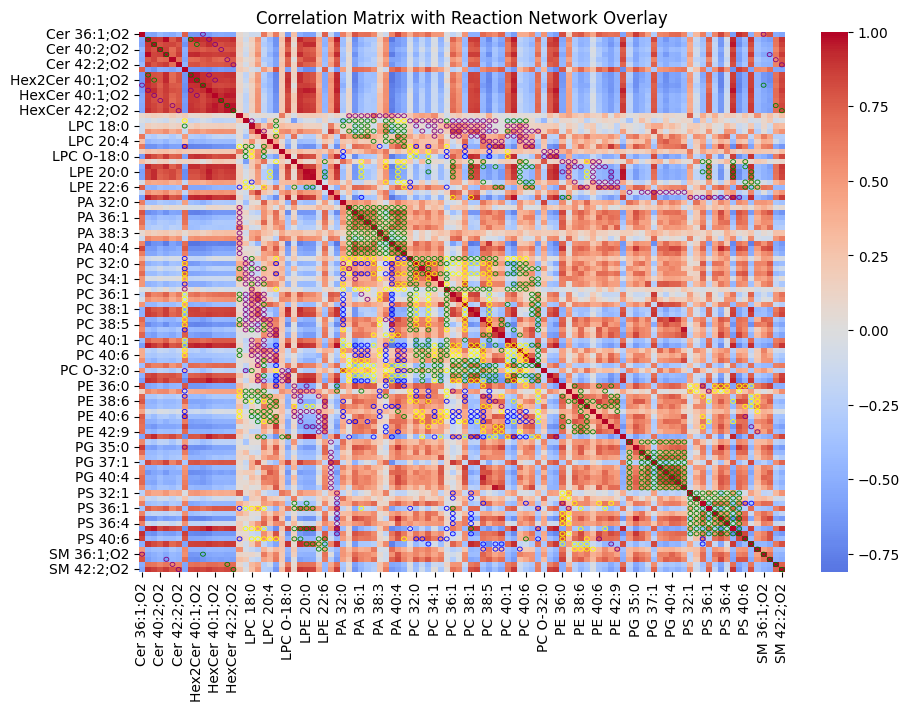

In [60]:
import matplotlib.patches as patches

#index = 0
#lipizone_data = data[data['lipizone_names'] == lipizone_names[index]]

correlation_matrix = data[lipid_names].corr()

plt.figure(figsize=(9, 7), constrained_layout=True)

# Correlation heatmap
ax = sns.heatmap(correlation_matrix, cmap='coolwarm', cbar=True, center=0)

# Add neighbors from reaction network
colors = ['purple', 'green', 'yellow', 'blue']
visited_nodes = set()
for n in range(1, 5):
    neighbors = nth_nn(n, adj_matrix, indexes_to_remove)
    for i in range(len(lipid_names)):
        for j in range(len(lipid_names)):
            if neighbors[i, j] == 1 and (i, j) not in visited_nodes:
                circle = patches.Circle((j + 0.5, i + 0.5), radius=0.4, color=colors[n-1], fill=False, linewidth=0.6)
                ax.add_patch(circle)
                visited_nodes.add((i, j))

plt.title("Correlation Matrix with Reaction Network Overlay")
plt.savefig('figures/correlation_network_overlay.png')

Correlation distribution in 1st to 6th nearest neighbors couples. Note that the histograms are very similar starting from the 3rd -> two or three message passing layers should be enough. TODO: add some per-lipid information

Saved combined figure to figures/neighbors_corr_hist_grid.png


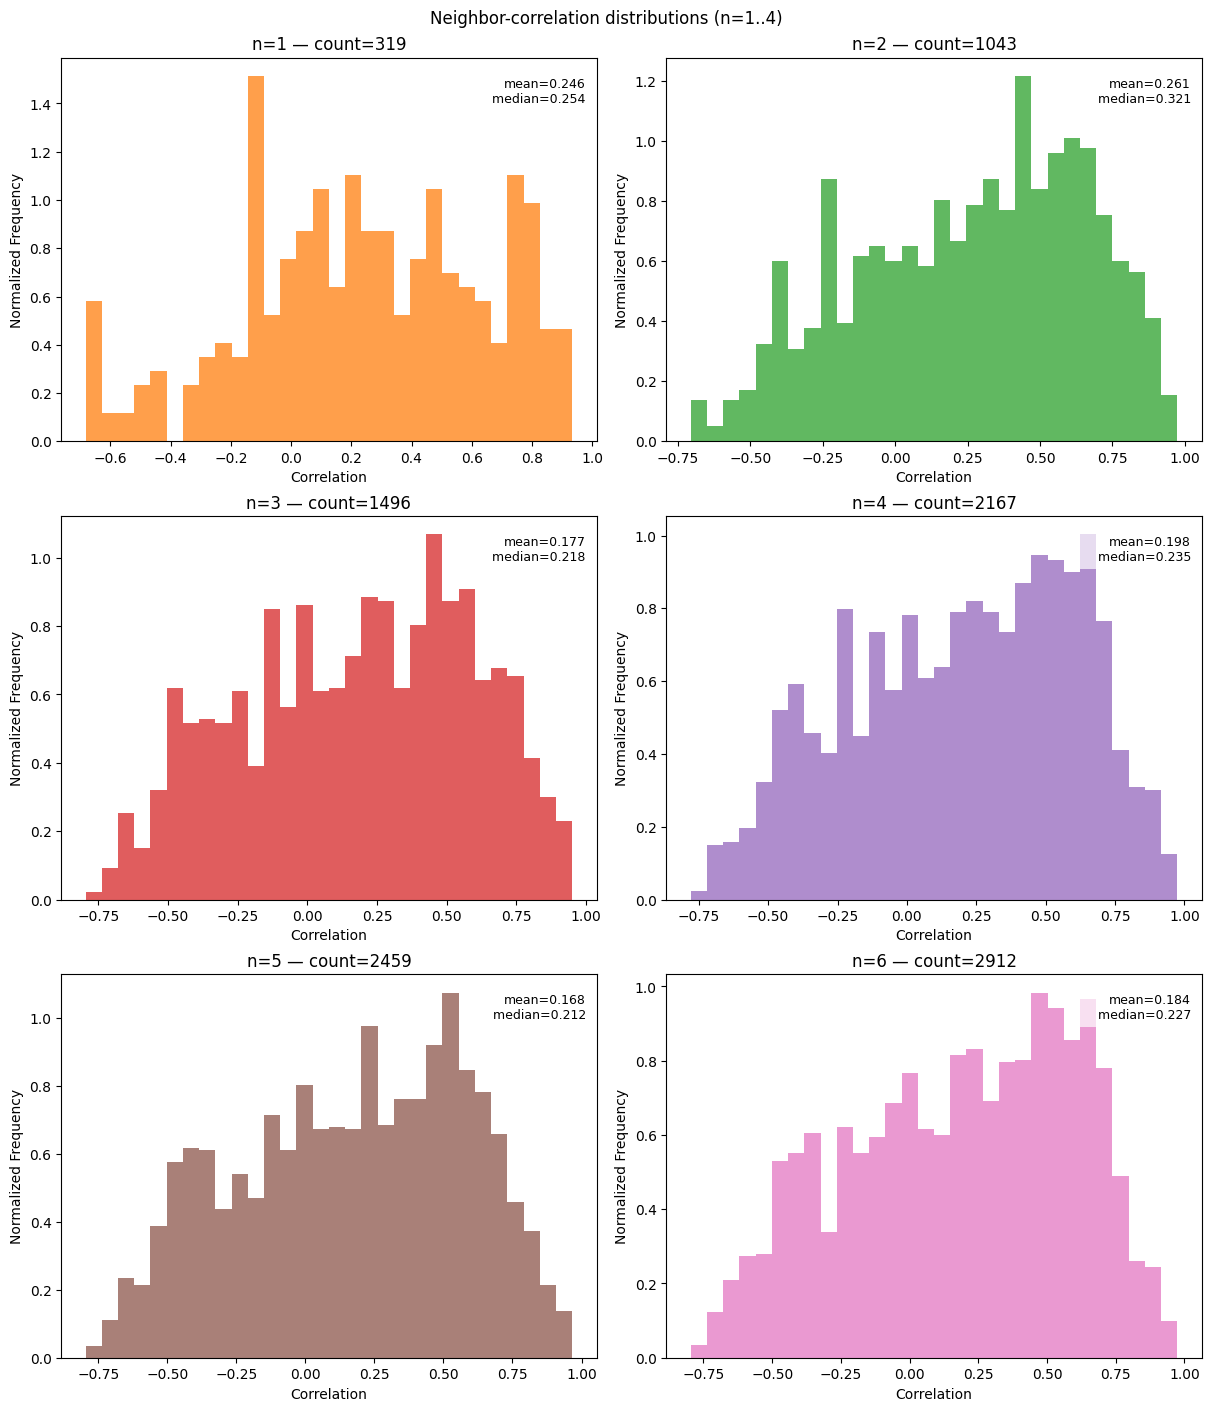

Summary statistics per neighborhood order:


,count,mean,median
n,,,
1,319,0.245547,0.254410
2,1043,0.260772,0.320603
3,1496,0.177427,0.218116
4,2167,0.197807,0.235024
5,2459,0.168078,0.211892
6,2912,0.184320,0.227377


In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 14), constrained_layout=True)
axes = axes.flatten()
summary = []

for n in range(1, 7):
    neighbors = nth_nn(n, adj_matrix, indexes_to_remove)
    corrs = []
    for i in range(len(lipid_names)):
        for j in range(len(lipid_names)):
            if i == j:
                continue
            if neighbors[i, j] > 0:
                corrs.append(correlation_matrix.iloc[i, j])

    ax = axes[n-1]
    if len(corrs) == 0:
        ax.text(0.5, 0.5, f'No pairs for n={n}', ha='center', va='center')
        ax.set_title(f'n={n} (0 pairs)')
        summary.append({'n': n, 'count': 0, 'mean': np.nan, 'median': np.nan})
        continue

    ax.hist(corrs, bins=30, color=f'C{n}', alpha=0.75, density=True)
    mean_v = np.mean(corrs)
    median_v = np.median(corrs)
    cnt = len(corrs)
    ax.set_title(f'n={n} — count={cnt}')
    ax.set_xlabel('Correlation')
    ax.set_ylabel('Normalized Frequency')
    # annotate summary stats in corner
    ax.text(0.98, 0.95, f'mean={mean_v:.3f}\n    median={median_v:.3f}', ha='right', va='top', transform=ax.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    summary.append({'n': n, 'count': int(cnt), 'mean': float(mean_v), 'median': float(median_v)})

# Save combined figure
out_path = 'figures/neighbors_corr_hist_grid.png'
plt.suptitle('Neighbor-correlation distributions (n=1..6)')
plt.savefig(out_path, bbox_inches='tight')
print(f'Saved combined figure to {out_path}')
plt.show()

# Print summary table
try:
    summary_df = pd.DataFrame(summary).set_index('n')
    print('Summary statistics per neighborhood order:')
    display(summary_df)
except Exception:
    print(summary)


In [64]:
correlation_matrix_np = correlation_matrix.to_numpy()
mask = ~np.eye(correlation_matrix_np.shape[0], dtype=bool)
np.mean(correlation_matrix_np[mask])

np.float64(0.1429398529183967)

# Mutual information
too slow...

In [ ]:
from sklearn.feature_selection import mutual_info_regression

n_lipids = len(lipid_names)
mi_matrix = pd.DataFrame(np.zeros((n_lipids, n_lipids)), index=lipid_names, columns=lipid_names)

for i in range(n_lipids):
    for j in range(i, n_lipids):
        print(i, j)
        mi = mutual_info_regression(data[[lipid_names[i]]], data[lipid_names[j]], random_state=0, n_jobs=-1)
        mi_matrix.iloc[i, j] = mi[0]
        mi_matrix.iloc[j, i] = mi[0]

plt.figure(figsize=(9, 7), constrained_layout=True)
ax = sns.heatmap(mi_matrix, cmap='viridis', cbar=True)
plt.title("Mutual Information Matrix")
plt.savefig('figures/mutual_information_matrix.png')


# ENZYMES
Quite incomplete. The histogram is as before but shows reactions driven by different enzymes.

In [62]:
reaction_enzymes = pd.read_csv('Supplementary Table 4 LBA.csv', index_col=0)
reaction_enzymes.sort_index(inplace=True)
enzymes = list(reaction_enzymes['enzyme'].unique())
enzymes.append('No enzyme')

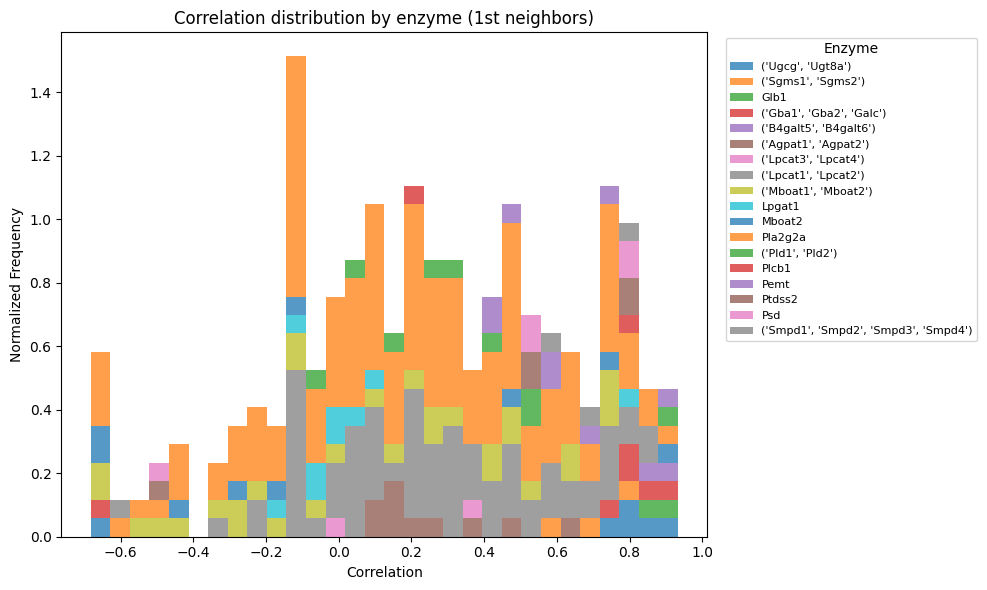

In [63]:
enz_corrs = [[] for _ in enzymes]
enz_exists = {enzyme: False for enzyme in enzymes}

# Collect correlation values for 1st-neighbor pairs and group by enzyme
neighbors = nth_nn(1, adj_matrix, indexes_to_remove)
for i in range(len(lipid_names)):
    for j in range(len(lipid_names)):
        if i == j:
            continue
        if neighbors[i, j] > 0:
            cond = (reaction_enzymes['reagent'] == lipid_names[i]) & (reaction_enzymes['product'] == lipid_names[j])
            if not cond.any():
                enzyme = 'No enzyme'
                #print(lipid_names[i], lipid_names[j])
                enz_exists[enzyme] = True
            else:
                # choose the first matching enzyme name (string)
                enzyme = reaction_enzymes.loc[cond, 'enzyme'].iloc[0]
                enz_exists[enzyme] = True
            enz_corrs[enzymes.index(enzyme)].append(correlation_matrix.iloc[i, j])

# Remove enzymes with no data
enz_corrs_filtered = [corrs for enzyme, corrs in zip(enzymes, enz_corrs) if enz_exists[enzyme]]
enzymes_filtered = [enzyme for enzyme in enzymes if enz_exists[enzyme]]

# Plot stacked histogram and add a legend mapping colors to enzymes
fig, ax = plt.subplots(figsize=(10, 6))
# Use barstacked; pass the full enzymes list as labels so legend shows mapping
ax.hist(enz_corrs_filtered, bins=30, alpha=0.75, density=True, histtype='barstacked', label=enzymes_filtered)
ax.set_xlabel('Correlation')
ax.set_ylabel('Normalized Frequency')
ax.set_title('Correlation distribution by enzyme (1st neighbors)')
# Place legend to the right of the axes
ax.legend(title='Enzyme', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.savefig('figures/enzyme_correlation_histogram.png')
plt.show()

# SPATIAL MAPS
Trying to investigate double peaks in the concentration distribution of some lipids

In [ ]:
# For the chosen lipid and lipizone, create per-section spatial scatter plots
import os

lipid_name = 'LPC 18:1'
lipizone_index = 2
lipid = lipid_name
lipizone = lipizone_names[lipizone_index]
os.makedirs('figures', exist_ok=True)

sections = data['Section'].unique()
for section in sections:
    subset = data[(data['Section'] == section) & (data['lipizone_names'] == lipizone)]
    if subset.empty:
        # nothing to plot for this section+lipizone
        continue

    # Ensure columns exist
    if 'xccf' not in subset.columns or 'yccf' not in subset.columns:
        print(f"Missing xccf/yccf columns for section {section}. Skipping.")
        continue
    if lipid not in subset.columns:
        print(f"Lipid '{lipid}' not present in data columns. Skipping section {section}.")
        continue

    x = subset['x'].to_numpy()
    y = subset['y'].to_numpy()
    conc = subset[lipid].to_numpy()

    # mask invalid values
    mask = ~np.isnan(x) & ~np.isnan(y) & ~np.isnan(conc)
    if mask.sum() == 0:
        continue
    x = x[mask]
    y = y[mask]
    conc = conc[mask]

    fig, ax = plt.subplots(figsize=(6,6))
    sc = ax.scatter(x, y, c=conc, cmap='viridis', s=15)
    ax.set_title(f"{lipid} — lipizone: {lipizone} — section: {section}")
    ax.set_xlabel('xccf')
    ax.set_ylabel('yccf')
    ax.axis('equal')
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('concentration')

    # sanitize filenames
    safe_section = str(section).replace(' ', '_').replace('/', '_')
    safe_lipid = lipid.replace(' ', '_').replace(':', '-')
    out = f"figures/spatial_plots/spatial_{safe_lipid}_lipizone_{lipizone_index}_section_{safe_section}.png"
    plt.savefig(out, bbox_inches='tight', dpi=150)
    plt.close(fig)

In [34]:
threshold = 0.0011

# plot: make NaNs transparent
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#2b83ba', '#fdae61'])   # color for low, high
cmap.set_bad((0,0,0,0))                         # transparent for missing

for section in sections:
    subset = data[(data['Section'] == section) & (data['lipizone_names'] == lipizone)]
    if subset.empty:
        # nothing to plot for this section+lipizone
        continue

    # Ensure columns exist
    if 'xccf' not in subset.columns or 'yccf' not in subset.columns:
        print(f"Missing xccf/yccf columns for section {section}. Skipping.")
        continue
    if lipid not in subset.columns:
        print(f"Lipid '{lipid}' not present in data columns. Skipping section {section}.")
        continue
    
    x_border = data[(data['boundary'] == 1) & (data['Section'] == section)]['zccf'].to_numpy()
    y_border = data[(data['boundary'] == 1) & (data['Section'] == section)]['yccf'].to_numpy()
    x = subset['zccf'].to_numpy()
    y = subset['yccf'].to_numpy()
    conc = subset[lipid].to_numpy()

    # mask invalid values
    mask = ~np.isnan(x) & ~np.isnan(y) & ~np.isnan(conc)
    if mask.sum() == 0:
        continue
    x = x[mask]
    y = y[mask]
    conc = conc[mask]

    # binary map: 0 = <= threshold, 1 = > threshold; keep NaN for no-data
    binary = np.full_like(conc, np.nan)
    binary[~np.isnan(conc) & (conc <= threshold) & (conc > 0)] = 0
    binary[~np.isnan(conc) & (conc > threshold)] = 1

    fig, ax = plt.subplots(figsize=(6,6))
    border = ax.scatter(x_border, -y_border,c='black', s=1, alpha=0.3)
    sc = ax.scatter(x, -y, c=binary, cmap=cmap, s=10)
    ax.set_title(f"{lipid} — lipizone: {lipizone} — section: {section}")
    ax.set_xlabel('xccf')
    ax.set_ylabel('yccf')
    ax.axis('equal')
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('concentration')

    # sanitize filenames
    safe_section = str(section).replace(' ', '_').replace('/', '_')
    safe_lipid = lipid.replace(' ', '_').replace(':', '-')
    out = f"figures/spatial_plots/binary_spatial_{safe_lipid}_lipizone_{lipizone_index}_section_{safe_section}.png"
    plt.savefig(out, bbox_inches='tight', dpi=150)
    plt.close(fig)
